# Abnormal returns around dividends.

Prepared by [Vincent Grégoire](http://www.vincentgregoire.com), Department of Finance, The University of Melbourne. 

This is a sample code to illustrate how to load and analyse CRSP data in Python.
This notebook was created as supplemental material to a Python for financial research bootcamp for finance honours and PhD students at the University of Melbourne in March of 2017.

Last update: March 24, 2017.

**Contact**: <vincent.gregoire@unimelb.edu.au>

Latest version: <http://www.vincentgregoire.com/python-bootcamp/>


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

I have downloaded form WRDS, in .csv format, 10 years worth of stock data (daily), plus dividend events from the events file.

In [2]:
# Let's first look at dividends
dividends_df = pd.read_csv('data/dividends.csv.gz')

# I prefer to use lower case column names
dividends_df.columns = [x.lower() for x in dividends_df]

In [3]:
dividends_df.head(5)

,permno,distcd,divamt,facpr,facshr,dclrdt,exdt,rcrddt,paydt
0,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1232.0,0.14,0.0,0.0,20061204.0,20070213.0,20070215.0,20070228.0
2,10001,1232.0,0.15,0.0,0.0,20070426.0,20070503.0,20070507.0,20070517.0
3,10001,1232.0,0.16,0.0,0.0,20070830.0,20070907.0,20070911.0,20070925.0
4,10001,1232.0,0.16,0.0,0.0,20071024.0,20071101.0,20071105.0,20071119.0


Looking at the data, we see there are some missing entries, we want to clean those. Also, CRSP stores dates in a YYYYMMDD numerical format that pandas detects as numbers, so we want to convert those as well.

In [4]:
# First drop those missing values

# Find rows with any misssing value
missing = dividends_df.isnull().any(axis=1)
# Drop them from or data
if sum(missing) > 0:
    dividends_df = dividends_df[~missing].copy()
dividends_df.head()

,permno,distcd,divamt,facpr,facshr,dclrdt,exdt,rcrddt,paydt
1,10001,1232.0,0.140,0.0,0.0,20061204.0,20070213.0,20070215.0,20070228.0
2,10001,1232.0,0.150,0.0,0.0,20070426.0,20070503.0,20070507.0,20070517.0
3,10001,1232.0,0.160,0.0,0.0,20070830.0,20070907.0,20070911.0,20070925.0
4,10001,1232.0,0.160,0.0,0.0,20071024.0,20071101.0,20071105.0,20071119.0
5,10001,1222.0,0.054,0.0,0.0,20071129.0,20071206.0,20071210.0,20071228.0


In [5]:
# We first need to define a function to convert the dates.
def compute_date_crsp(int_date):
    if np.isnan(int_date):
        return int_date
    int_date = int(int_date)
    year = int_date//10000
    month = int_date//100 - year*100
    day = int_date - month*100 - year*10000
    return datetime(year, month, day)

In [6]:
dividends_df['dclrdt'] = dividends_df['dclrdt'].apply(lambda x: compute_date_crsp(x))
dividends_df['exdt'] = dividends_df['exdt'].apply(lambda x: compute_date_crsp(x))
dividends_df['rcrddt'] = dividends_df['rcrddt'].apply(lambda x: compute_date_crsp(x))
dividends_df['paydt'] = dividends_df['paydt'].apply(lambda x: compute_date_crsp(x))

In [7]:
dividends_df.head()

,permno,distcd,divamt,facpr,facshr,dclrdt,exdt,rcrddt,paydt
1,10001,1232.0,0.140,0.0,0.0,2006-12-04,2007-02-13,2007-02-15,2007-02-28
2,10001,1232.0,0.150,0.0,0.0,2007-04-26,2007-05-03,2007-05-07,2007-05-17
3,10001,1232.0,0.160,0.0,0.0,2007-08-30,2007-09-07,2007-09-11,2007-09-25
4,10001,1232.0,0.160,0.0,0.0,2007-10-24,2007-11-01,2007-11-05,2007-11-19
5,10001,1222.0,0.054,0.0,0.0,2007-11-29,2007-12-06,2007-12-10,2007-12-28


We usually care about the ex-dividend date. Let's see what's the seasonal distribution. We can plot the numbers of annoucements per month of the year. We would expect a quarterly and an annual pattern

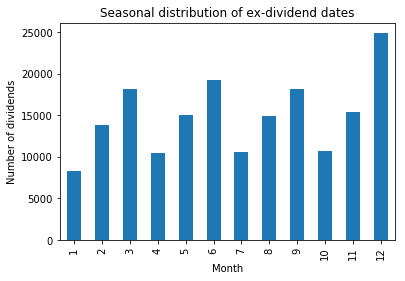

In [8]:
dividends_df.groupby(dividends_df['exdt'].dt.month)['divamt'].count().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of dividends')
plt.title('Seasonal distribution of ex-dividend dates')

In [9]:
dividends_df.describe()

,permno,distcd,divamt,facpr,facshr
count,179765.000000,179765.000000,179765.000000,179765.0,179765.0
mean,70077.165983,1229.702373,0.202402,0.0,0.0
std,28807.987154,13.158827,0.836218,0.0,0.0
min,10001.000000,1212.000000,0.000000,0.0,0.0
25%,60098.000000,1222.000000,0.060500,0.0,0.0
50%,85082.000000,1232.000000,0.104500,0.0,0.0
75%,90108.000000,1232.000000,0.230000,0.0,0.0
max,93429.000000,1392.000000,235.000000,0.0,0.0


In [10]:
# We have a few $0.00 dividends, so we'll throw those out.
dividends_df = dividends_df[dividends_df.divamt > 0.0].copy()
dividends_df.describe()

,permno,distcd,divamt,facpr,facshr
count,179763.000000,179763.000000,179763.000000,179763.0,179763.0
mean,70076.987689,1229.702236,0.202405,0.0,0.0
std,28808.087901,13.158455,0.836222,0.0,0.0
min,10001.000000,1212.000000,0.000020,0.0,0.0
25%,60098.000000,1222.000000,0.060500,0.0,0.0
50%,85082.000000,1232.000000,0.104500,0.0,0.0
75%,90108.000000,1232.000000,0.230000,0.0,0.0
max,93429.000000,1392.000000,235.000000,0.0,0.0


In [11]:
# Let's now look at our stock returns. Since it's a large dataset,
# we begin by loading a small subsample.
dsf_df = pd.read_csv('data/crsp_dsf.csv.gz',
                     na_values=['B', 'C'], nrows=100)
dsf_df.head()

,PERMNO,date,SHRCD,EXCHCD,PERMCO,DLRETX,DLRET,PRC,VOL,RET,SHROUT,NUMTRD,RETX,vwretd,vwretx
0,10001,01/03/2007,11,3,7953,NaN,NaN,11.100,4311,0.000000,2959,21,0.000000,-0.001347,-0.001511
1,10001,01/04/2007,11,3,7953,NaN,NaN,11.360,4600,0.023423,2959,30,0.023423,0.000547,0.000544
2,10001,01/05/2007,11,3,7953,NaN,NaN,11.250,510,-0.009683,2959,4,-0.009683,-0.007288,-0.007293
3,10001,01/08/2007,11,3,7953,NaN,NaN,-11.345,0,0.008444,2959,0,0.008444,0.002567,0.002354
4,10001,01/09/2007,11,3,7953,NaN,NaN,11.240,600,-0.009255,2959,6,-0.009255,-0.000001,-0.000001


In [12]:
# Note that CRSP data sometimes has letter codes for special situations. 
# We discard them here ('A', 'B', 'C', 'S', 'T'),
# but you might want to have a look at the documentation before you do in your
# projects, they are there for a reason.


# We only want a subset of the columns, specifying them will make loading faster.
cols = [u'PERMNO', u'date', u'SHRCD', u'EXCHCD', u'DLRETX', u'DLRET',
        u'PRC', u'VOL', u'RET', u'SHROUT', u'RETX', u'vwretd']

dsf_df = pd.read_csv('data/crsp_dsf.csv.gz',
                     usecols=cols,
                     na_values=['A', 'B', 'C', 'S', 'T'])
dsf_df.columns = [x.lower() for x in dsf_df]

In [13]:
len(dsf_df)

17350200

In [14]:
dsf_df.head()

,permno,date,shrcd,exchcd,dlretx,dlret,prc,vol,ret,shrout,retx,vwretd
0,10001,01/03/2007,11.0,3.0,NaN,NaN,11.100,4311.0,0.000000,2959.0,0.000000,-0.001347
1,10001,01/04/2007,11.0,3.0,NaN,NaN,11.360,4600.0,0.023423,2959.0,0.023423,0.000547
2,10001,01/05/2007,11.0,3.0,NaN,NaN,11.250,510.0,-0.009683,2959.0,-0.009683,-0.007288
3,10001,01/08/2007,11.0,3.0,NaN,NaN,-11.345,0.0,0.008444,2959.0,0.008444,0.002567
4,10001,01/09/2007,11.0,3.0,NaN,NaN,11.240,600.0,-0.009255,2959.0,-0.009255,-0.000001


In [15]:
# CRSP does a few other quirky things, such as having negative prices
# to indicate when the closing price was not available. 
dsf_df['prc'] = np.abs(dsf_df['prc'])

In [16]:
# We also fill in delisting returns for missing returns when available.
sel = dsf_df.ret.isnull()
dsf_df.loc[sel, 'ret'] = dsf_df.loc[sel, 'dlret']
sel = dsf_df.retx.isnull()
dsf_df.loc[sel, 'retx'] = dsf_df.loc[sel, 'dlretx']

In [17]:
# And drop the returns that are still missing
sel = dsf_df[['ret', 'retx']].isnull().any(axis=1)
dsf_df = dsf_df[~sel].copy()

In [18]:
# It is typical to only keep share codes 10 and 11 (common shares), and exchange 1, 2 and 3
# (NYSE, Nasdaq and Amex/NYSE MKT/NYSE American)
dsf_df.shrcd.unique()

array([ 11.,  14.,  73.,  12.,  31.,  18.,  71.,  75.,  44.,  74.,  48.,
        21.,  72.,  15.,  10.,  41.])

In [19]:
dsf_df = dsf_df[dsf_df.shrcd.isin([10, 11])].copy()

In [20]:
dsf_df.exchcd.unique()

array([  3.,   2.,   1.,   4.,  32.,  33.])

In [21]:
dsf_df = dsf_df[dsf_df.exchcd.isin([1, 2, 3])].copy()

In [22]:
print('We are left with ' + str(len(dsf_df)) + ' observations with ' +
      str(dsf_df.permno.nunique()) + ' unique stocks.')

We are left with 10025682 observations with 6703 unique stocks.


We still need to parse dates. It's better to wait until we have filtered down the sample
so that we have fewer dates to parse. We could parse the dates with `pd.to_datetime()`,
but given the number of observations it will take a while (I'm not patient).

I have developped a shortcut that works well with this type of data, where we have 
many observations of the same date (one for each stock). The trick is to first extract
the list of unique dates, parse this short list, and then swap (using `map`) in the 
larger dataset.

In [23]:
def parse_simple_date(d):
    return datetime.strptime(d, '%m/%d/%Y')

def fast_date_parse(df, col, date_parser=parse_simple_date):
    dt = pd.DataFrame(df[col].unique())
    dt.columns = [col + '_tmp']
    dt[col] = dt[col + '_tmp'].apply(date_parser)
    date_dict = dt.set_index(col + '_tmp').to_dict()
    df[col] = df[col].map(date_dict[col])
    return df

In [24]:
dsf_df = fast_date_parse(dsf_df, 'date')

Now we have stock returns ready to go, and a file with dividend events. We want to match
the two datasets, and get a window of 10 tradings days around the ex-dividend date.
If we were doing this in SAS, we could put date ranges in our matching condition, but
pandas doesn't allow that. What we can do is create our date range first, then match
on specific dates.



Pandas support business days (Mon-Fri) out of the box for creating date ranges, but we want to be more specific and use actual trading days, taking into account holidays and such. Pandas can do this very neatly, but in this case
we don't need it, all the dates are in our `dsf` dataset, we just need to extract them.

In [25]:
dates = pd.DataFrame(dsf_df.date.unique()).sort_values(0)
dates.columns = ['date']

In [26]:
dates.head()

,date
0,2007-01-03
1,2007-01-04
2,2007-01-05
3,2007-01-08
4,2007-01-09


In [27]:
len(dates)

2518

In [28]:
# Merging, we are creating a very large dataset

dates['tmp'] = 1
dates_cross = pd.merge(dates, dates, on=['tmp'],
                       suffixes=('', '_obs'))

In [29]:
dates_cross['dateID'] = dates_cross.groupby('date')['tmp'].cumsum()

# Set the ID of the date to 0. We first need to find the ID of the date, then
# match and subtract.
dates_0 = pd.merge(dates_cross,
                   dates_cross.loc[dates_cross.date == dates_cross.date_obs,
                                   ['date', 'dateID']],
                   on=['date'],
                   suffixes=('', '_0'))

In [30]:
dates_0['event_t'] = dates_0['dateID'] - dates_0['dateID_0'] 

In [31]:
dates_0.head()

,date,tmp,date_obs,dateID,dateID_0,event_t
0,2007-01-03,1,2007-01-03,1,1,0
1,2007-01-03,1,2007-01-04,2,1,1
2,2007-01-03,1,2007-01-05,3,1,2
3,2007-01-03,1,2007-01-08,4,1,3
4,2007-01-03,1,2007-01-09,5,1,4


In [32]:
# Say we want windows of +/- 10 days, that means we want dates with event_t between -10 and 10
dates_win = dates_0.loc[(dates_0.event_t >= -10) & (dates_0.event_t <= 10),
                       ['date', 'date_obs', 'event_t']].copy()

In [33]:
# Now we can merge this with our event file. So for each event, we'll have a list of the daily observations
# we want to merge.

dividends_days = pd.merge(dividends_df, dates_win, 
                          left_on='exdt',
                          right_on='date')

In [34]:
dividends_days.head()

,permno,distcd,divamt,facpr,facshr,dclrdt,exdt,rcrddt,paydt,date,date_obs,event_t
0,10001,1232.0,0.14,0.0,0.0,2006-12-04,2007-02-13,2007-02-15,2007-02-28,2007-02-13,2007-01-30,-10
1,10001,1232.0,0.14,0.0,0.0,2006-12-04,2007-02-13,2007-02-15,2007-02-28,2007-02-13,2007-01-31,-9
2,10001,1232.0,0.14,0.0,0.0,2006-12-04,2007-02-13,2007-02-15,2007-02-28,2007-02-13,2007-02-01,-8
3,10001,1232.0,0.14,0.0,0.0,2006-12-04,2007-02-13,2007-02-15,2007-02-28,2007-02-13,2007-02-02,-7
4,10001,1232.0,0.14,0.0,0.0,2006-12-04,2007-02-13,2007-02-15,2007-02-28,2007-02-13,2007-02-05,-6


In [35]:
# Now let's merge on stock returns.
merged_df = pd.merge(dividends_days, dsf_df,
                     left_on=['permno', 'date_obs'],
                     right_on=['permno', 'date'],
                     suffixes=('', '_dsf'))

In [36]:
# Count the number of observations for each event. We drop those that are not complete
# to make things easier.
counts = merged_df.groupby(['permno', 'date'])[['date_obs']].count()

In [37]:
sum(counts.date_obs < 21)

518

In [38]:
counts[counts.date_obs == 21].head()

date_obs
permno date                
10001  2007-02-13        21
       2007-05-03        21
       2007-09-07        21
       2007-11-01        21
       2007-12-06        21

In [39]:
merged_df = pd.merge(merged_df,
                     counts,
                     left_on=['permno', 'date'],
                     right_index=True)

In [40]:
# As usual, we care about cumulative returns,
# and abnormal returns (market-adjusted).

# A crude measure is the CAR (cumulated abnormal returns)
# which is the cumulative sum of daily returns
# minus daily market returns.

merged_df['aret'] = merged_df['ret'] - merged_df['vwretd']
merged_df['aretx'] = merged_df['retx'] - merged_df['vwretd']

merged_df['caret'] = merged_df.groupby(['permno', 'date'])['aret'].cumsum()
merged_df['caretx'] = merged_df.groupby(['permno', 'date'])['aretx'].cumsum()

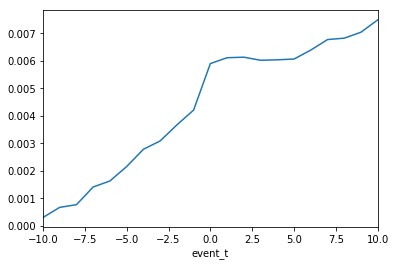

In [41]:
merged_df.groupby('event_t')['caret'].mean().plot()

That's a nice plot, but it can be made better with labels, confidence intervals, and more.

To add confidence intervals, we need to compute the standard errors around the mean, which are:

$ se = \frac{\hat{\sigma}}{\sqrt{n}}$

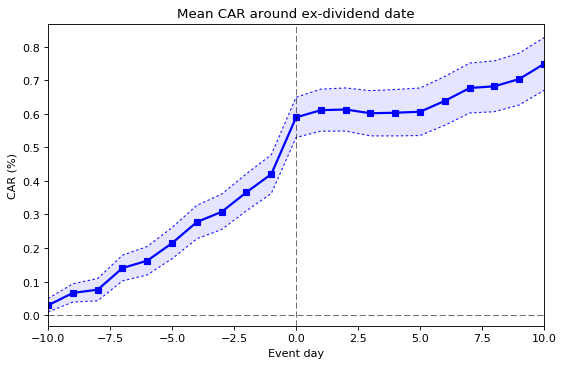

In [42]:
# Initialise the figure
fig, axes = plt.subplots(1, 1, figsize=(8, 5), dpi=80)

# Compute the mean, multiply by 100 to have in %
mean = merged_df.groupby('event_t')['caret'].mean() * 100
# Compute the standard error around the mean
se = (merged_df.groupby('event_t')['caret'].std()
      / np.sqrt(merged_df.groupby('event_t')['caret'].count())) * 100
# We'll use 95\% confidence intervals, so +/- 1.96 * se
mean_p = mean + 1.96 * se
mean_m = mean - 1.96 * se

mean.plot(ax=axes, linestyle='-', linewidth=2, marker='s',
          color='blue', alpha=1.0)
mean_m.plot(ax=axes, linestyle=':', linewidth=1, marker=None,
          color='blue', alpha=0.9)
mean_p.plot(ax=axes, linestyle=':', linewidth=1, marker=None,
          color='blue', alpha=0.9)
axes.fill_between(mean_m.index, mean_m, mean_p, facecolor='blue', alpha=0.1)

# Add vertical and horizontla lines at t= 0
axes.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
axes.axhline(y=0, color='k', linestyle='--', linewidth=0.5)

axes.set_ylabel('CAR (%)')
axes.set_xlabel('Event day')
axes.set_title('Mean CAR around ex-dividend date')


#fig.tight_layout()
fig.savefig('MeanCAR.pdf', dpi=1000)

This is nice, but it would be great to reuse that code to plot all the variables of interest. Why not make it a function?

In [43]:
def plot_exdate(varname, xlabel, ylabel, title, fn, show_hline=True):
    # Initialise the figure
    fig, axes = plt.subplots(1, 1, figsize=(8, 5), dpi=80)

    # Compute the mean, multiply by 100 to have in %
    mean = merged_df.groupby('event_t')[varname].mean() * 100
    # Compute the standard error around the mean
    se = (merged_df.groupby('event_t')[varname].std()
          / np.sqrt(merged_df.groupby('event_t')[varname].count())) * 100
    # We'll use 95\% confidence intervals, so +/- 1.96 * se
    mean_p = mean + 1.96 * se
    mean_m = mean - 1.96 * se

    mean.plot(ax=axes, linestyle='-', linewidth=2, marker='s',
              color='blue', alpha=1.0)
    mean_m.plot(ax=axes, linestyle=':', linewidth=1, marker=None,
              color='blue', alpha=0.9)
    mean_p.plot(ax=axes, linestyle=':', linewidth=1, marker=None,
              color='blue', alpha=0.9)
    axes.fill_between(mean_m.index, mean_m, mean_p, facecolor='blue', alpha=0.1)

    # Add vertical and horizontla lines at t= 0
    axes.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
    if show_hline:
        axes.axhline(y=0, color='k', linestyle='--', linewidth=0.5)

    axes.set_ylabel(ylabel)
    axes.set_xlabel(xlabel)
    axes.set_title(title)


    #fig.tight_layout()
    fig.savefig(fn, dpi=1000)

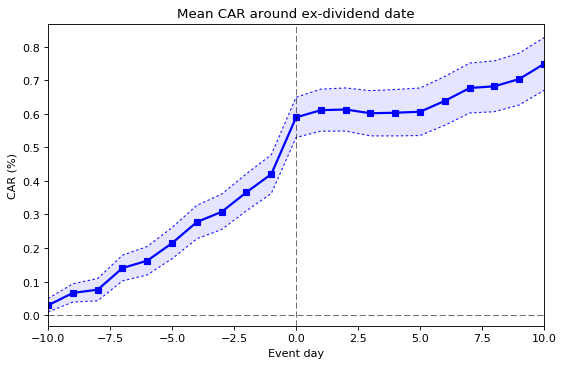

In [44]:
plot_exdate('caret', 'Event day', 'CAR (%)', 'Mean CAR around ex-dividend date', 'MeanCAR.pdf')

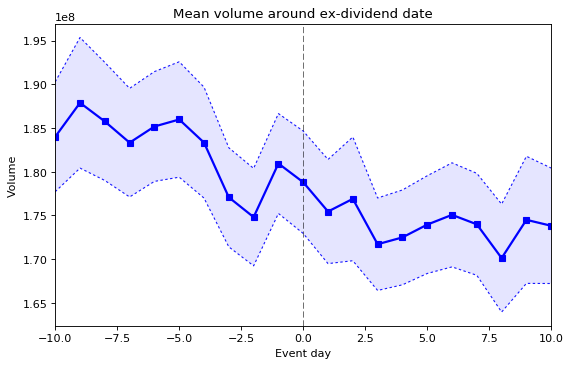

In [45]:
plot_exdate('vol', 'Event day', 'Volume', 'Mean volume around ex-dividend date',
            'MeanVolume.pdf', show_hline=False)

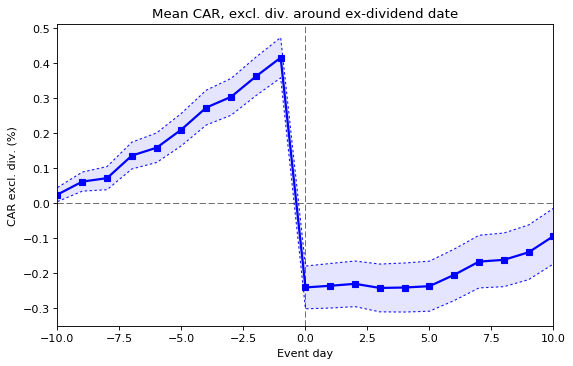

In [46]:
plot_exdate('caretx', 'Event day', 'CAR excl. div. (%)', 'Mean CAR, excl. div. around ex-dividend date', 'MeanCAR.pdf')